# Dimentionality reduction - Principal Component Analysis (PCA)

## 0. Introduction

This notebook contains:
  1. Working example of PCA for Dimensionality Reduction

## 1. PCA for Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [7]:
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
  return X, y

In [3]:
def get_models():
  models = dict()
  for i in range(1, 21):
    pca = PCA(n_components=i)
    model = LogisticRegression()
    steps = [('p', pca), ('m', model)]
    models[str(i)] = Pipeline(steps=steps)
  return models

In [4]:
def evaluate_models(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv,  n_jobs=-1, error_score='raise')
  return n_scores

In [8]:
X, y = get_dataset()
models = get_models()
results = list()
names = list()
for name, model in models.items():
  scores = evaluate_models(model, X, y)
  results.append(scores)
  names.append(name)
  print(f"Model: {name}, Accuracy: {np.mean(results):.3f} ({np.std(results):.3f})")


Model: 1, Accuracy: 0.610 (0.050)
Model: 2, Accuracy: 0.608 (0.051)
Model: 3, Accuracy: 0.611 (0.051)
Model: 4, Accuracy: 0.615 (0.051)
Model: 5, Accuracy: 0.622 (0.050)
Model: 6, Accuracy: 0.628 (0.049)
Model: 7, Accuracy: 0.637 (0.053)
Model: 8, Accuracy: 0.644 (0.055)
Model: 9, Accuracy: 0.649 (0.055)
Model: 10, Accuracy: 0.653 (0.055)
Model: 11, Accuracy: 0.664 (0.064)
Model: 12, Accuracy: 0.675 (0.072)
Model: 13, Accuracy: 0.686 (0.079)
Model: 14, Accuracy: 0.695 (0.083)
Model: 15, Accuracy: 0.702 (0.086)
Model: 16, Accuracy: 0.709 (0.088)
Model: 17, Accuracy: 0.715 (0.089)
Model: 18, Accuracy: 0.720 (0.089)
Model: 19, Accuracy: 0.725 (0.089)
Model: 20, Accuracy: 0.729 (0.089)


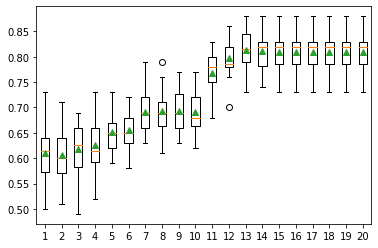

In [9]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()